# CIFAR-10 dataset classification

In [1]:
import scipy.io as sio
import numpy as np
import random
import math
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Data partitioning

In [2]:
# Read in the file
train_mat = sio.loadmat("train.mat")
print(train_mat)

{'__globals__': [], 'trainX': array([[ 59,  43,  50, ...,  84,  72,   6],
       [154, 126, 105, ..., 142, 144,   9],
       [255, 253, 253, ...,  83,  84,   9],
       ..., 
       [ 35,  40,  42, ...,  66,  50,   9],
       [189, 186, 185, ..., 171, 171,   1],
       [229, 236, 234, ..., 162, 161,   1]], dtype=int64), '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 20 17:23:11 2017', '__version__': '1.0'}


In [3]:
# Understand the data content
train_mat.keys()

dict_keys(['__globals__', 'trainX', '__header__', '__version__'])

In [4]:
# Get the training data
train_data = train_mat['trainX']
train_data

array([[ 59,  43,  50, ...,  84,  72,   6],
       [154, 126, 105, ..., 142, 144,   9],
       [255, 253, 253, ...,  83,  84,   9],
       ..., 
       [ 35,  40,  42, ...,  66,  50,   9],
       [189, 186, 185, ..., 171, 171,   1],
       [229, 236, 234, ..., 162, 161,   1]], dtype=int64)

In [5]:
# Check the amount of data in the training set
train_data.shape

(50000, 3073)

In [6]:
# Shuffle the data
np.random.shuffle(train_data)

In [7]:
# Set aside 5000 training images as a validation set
validation_index = np.array(random.sample(range(train_data.shape[0]), 5000))
validation_set = train_data[validation_index]

In [8]:
# Verify the validation set size
validation_set.shape

(5000, 3073)

In [9]:
# Construct the training set
training_data = np.delete(train_data, validation_index, 0)
print(training_data.shape)

# Separate the label and data
training_labels = training_data[:, 3072]
training_data = training_data[:, 0:3072]

(45000, 3073)


## SVM

### Separate labels and data from validation_set

In [10]:
validation_labels = validation_set[:, 3072]
validation_data = validation_set[:, 0:3072]
print(validation_labels.shape)
print(validation_data.shape)

(5000,)
(5000, 3072)


### Training on n examples

In [15]:
accuracy_score = []
training_accuracy_score = []
def training_classifier(n, param = 1.0, l = accuracy_score, l2 = None):
    # Get 100 training data
    training_data1 = training_data[0:n]
    training_labels1 = training_labels[0:n]
    # Build the SVC classifier
    classifier1 = SVC(C = param, kernel='linear')
    classifier1.fit(training_data1, training_labels1)
    # Make prediction
    score1 = classifier1.score(validation_data, validation_labels)
    l.append(score1)
    if l2 != None:
        score2 = classifier1.score(training_data, training_labels)
        l2.append(score2)

In [16]:
training_size = [100, 200, 500, 1000, 2000, 5000]
for n in training_size:
    print(n)
    training_classifier(n, l = accuracy_score, l2 = training_accuracy_score)
print(accuracy_score)


100
200
500
1000
2000
5000
[0.19120000000000001, 0.24299999999999999, 0.26900000000000002, 0.28799999999999998, 0.31219999999999998, 0.31859999999999999]


In [20]:
print(training_accuracy_score)

[0.20453333333333334, 0.24982222222222222, 0.27866666666666667, 0.30717777777777777, 0.33008888888888888, 0.38511111111111113]


## Plot the accuracy score 

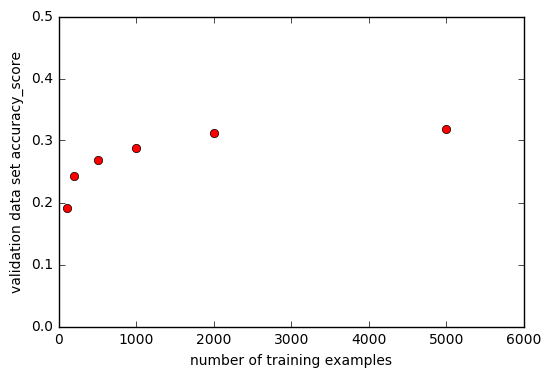

In [17]:
plt.plot(training_size, accuracy_score, "ro")
plt.ylabel("validation data set accuracy_score")
plt.xlabel("number of training examples")
plt.axis([0, 6000, 0, 0.5])
plt.show()

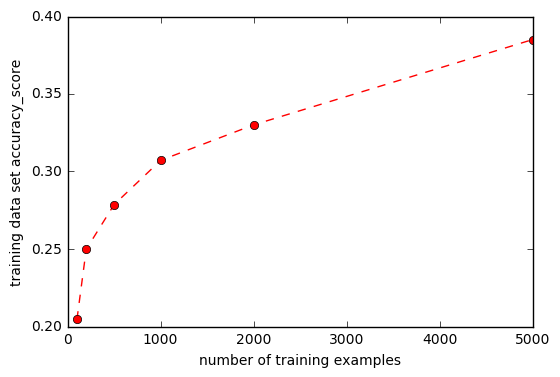

In [18]:
plt.plot(training_size, training_accuracy_score, "r--")
plt.plot(training_size, training_accuracy_score, "ro")
plt.ylabel("training data set accuracy_score")
plt.xlabel("number of training examples")
plt.show()

## Hyperparameter Tuning

In [21]:
max_accuracy_with_size = []
# Guess C values
Cs = list(range(100, 10, -5)) + [math.pow(10, 1), math.pow(10, 0), math.pow(10, -1), math.pow(10, -2),
      math.pow(10, -3), math.pow(10, -4), math.pow(10, -5),math.pow(10, -6), 
      math.pow(10, -7),math.pow(10, -8),math.pow(10, -10), math.pow(10, -20),
      math.pow(10, -30)]

In [ ]:
def tunner_with_size(n, score_list):
    for c in Cs:
        training_classifier(n, param = c, l = score_list)

In [22]:
accuracy_score100 = []
# Start finding the best parameter with 100 training examples
for c in Cs:
    training_classifier(100, param = c, l = accuracy_score100)
print(accuracy_score100)
max_accuracy_with_size.append(max(accuracy_score100))

[0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.19120000000000001, 0.18959999999999999, 0.20180000000000001, 0.096000000000000002, 0.096000000000000002, 0.096000000000000002, 0.096000000000000002]


In [23]:
accuracy_score200 = []
# Start finding the best parameter with 200 training examples
for c in Cs:
    training_classifier(200, c, l = accuracy_score200)
print(accuracy_score200)
max_accuracy_with_size.append(max(accuracy_score200))

[0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24299999999999999, 0.24279999999999999, 0.24779999999999999, 0.1706, 0.13159999999999999, 0.13159999999999999, 0.096199999999999994]


In [ ]:
accuracy_score500 = []
# Start finding the best parameter with 200 training examples
for c in Cs:
    training_classifier(500, c, l = accuracy_score500)
print(accuracy_score500)
max_accuracy_with_size.append(max(accuracy_score500))

In [ ]:
accuracy_score1000 = []
# Start finding the best parameter with 200 training examples
'''
for c in Cs:
    training_classifier(1000, c, l = accuracy_score1000)
'''

tunner_with_size(1000, accuracy_score1000)
print(accuracy_score1000)
max_accuracy_with_size.append(max(accuracy_score1000))

In [ ]:
accuracy_score2000 = []
# Start finding the best parameter with 200 training examples
for c in Cs:
    training_classifier(2000, c, l = accuracy_score2000)
print(accuracy_score2000)
max_accuracy_with_size.append(max(accuracy_score2000))

In [ ]:
accuracy_score5000 = []
# Start finding the best parameter with 200 training examples
for c in Cs:
    training_classifier(5000, c, l = accuracy_score5000)
print(accuracy_score5000)
max_accuracy_with_size.append(max(accuracy_score5000))

## Kaggle Prediction

In [ ]:
best_accuracy_index = max_accuracy_with_size.index(max(max_accuracy_with_size))
print(best_accuracy_index)
best_c = Cs[7]
best_c

In [ ]:
# Read in the test file
test_mat = sio.loadmat("test.mat")
print(test_mat)
print(test_mat.keys())

In [ ]:
# Make predictions
best_clf = SVC(C = best_c, kernel='linear')


test_data = test_mat['testX']

# Normalize the data
#test_data = normalize_data(test_data)

best_clf.fit(training_data, training_labels)
predictions = best_clf.predict(test_data)

In [ ]:
i = 0
with open('cifar_submission.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Id'] + ['Category'])
    for num in predictions:
        writer.writerow([i] + [num])
        i += 1